# Library Importing

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pip install --upgrade keras

In [8]:
import keras
print(keras.__version__)

3.9.2


# EDA

In [9]:
df=pd.read_csv('/content/loan_data.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [11]:
df=df.drop(columns=['Loan_ID'])

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [13]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [15]:
df.shape

(381, 12)

In [16]:
df.size

4572

In [17]:
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [18]:
df.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,322
CoapplicantIncome,182
LoanAmount,101
Loan_Amount_Term,10
Credit_History,2


In [19]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df.drop(['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status'],axis=1).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


Graphs

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

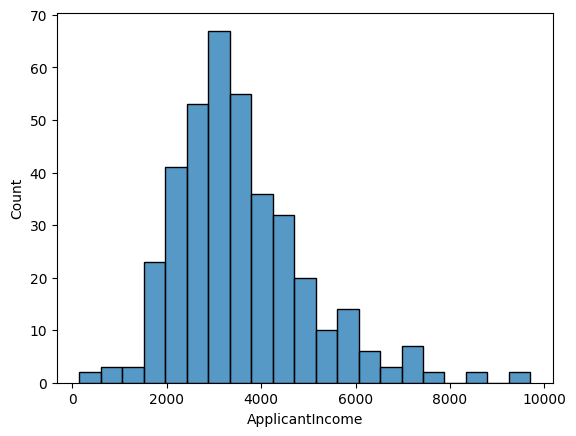

In [21]:
sns.histplot(data=df,x='ApplicantIncome')

<Axes: xlabel='LoanAmount', ylabel='count'>

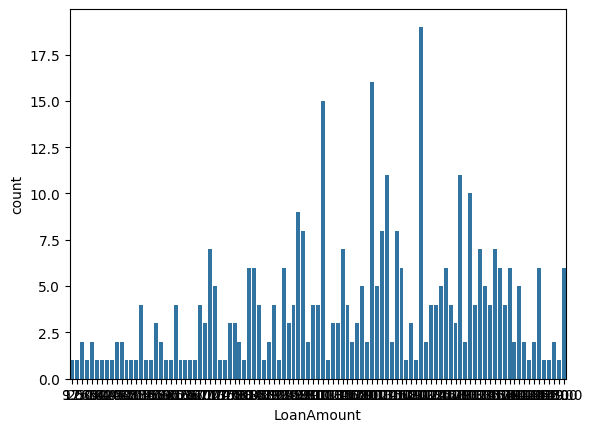

In [22]:
sns.countplot(data=df,x='LoanAmount')

<Axes: xlabel='ApplicantIncome'>

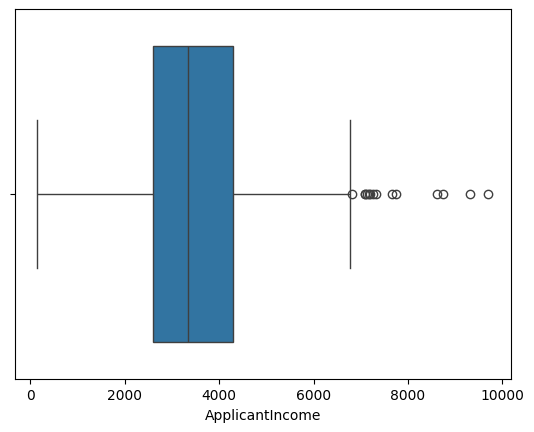

In [23]:
sns.boxplot(data=df,x='ApplicantIncome')

<Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

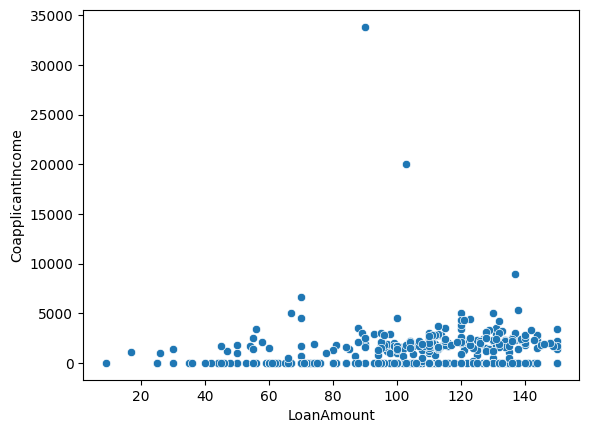

In [24]:
sns.scatterplot(data=df,x='LoanAmount',y='CoapplicantIncome')

# Data Cleaning

In [25]:
df.isnull().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


In [26]:
label=df['Gender'].mode()[0]
df['Gender'].fillna(label,inplace=True)

<ipython-input-26-c19f489d9173>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(label,inplace=True)


In [27]:
label=df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(label,inplace=True)

<ipython-input-27-11d097f18571>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(label,inplace=True)


In [28]:
label=df['Dependents'].mode()[0]
df['Dependents'].fillna(label,inplace=True)

<ipython-input-28-60afa158f03c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(label,inplace=True)


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

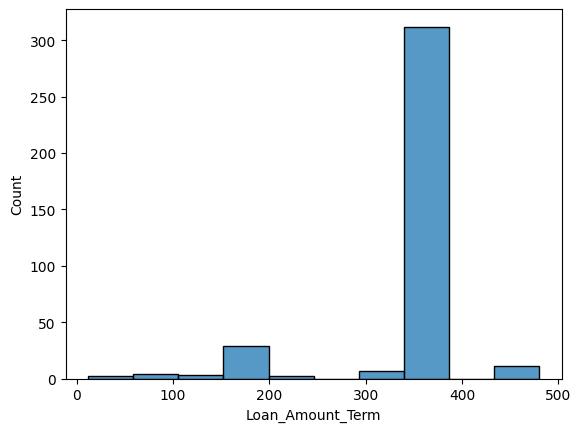

In [29]:
sns.histplot(data=df,x='Loan_Amount_Term')

In [30]:
#for left skeew graph above, we use median()
val=df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(val,inplace=True)

<ipython-input-30-b31030498fc7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(val,inplace=True)


<Axes: xlabel='Credit_History', ylabel='Count'>

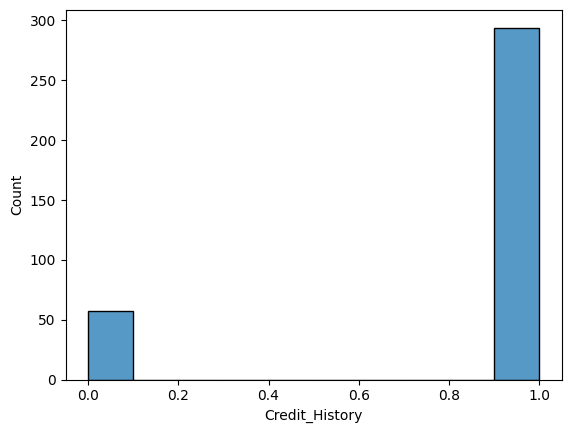

In [31]:
sns.histplot(data=df,x='Credit_History')

In [32]:
#for left skeew graph above, we use median()
val=df['Credit_History'].median()
df['Credit_History'].fillna(val,inplace=True)

<ipython-input-32-ebdcb335e583>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(val,inplace=True)


In [33]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# Label Encoding


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df['Gender']=le.fit_transform(df['Gender'])

In [37]:
df['Married']=le.fit_transform(df['Married'])

In [38]:
df['Education']=le.fit_transform(df['Education'])

In [39]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [40]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [41]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [42]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [43]:
#Everything converted to numeric values using Label Encoder
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB


# Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# Keras (Deep Learning)

In [48]:
import keras
from keras import layers
from keras import ops

In [49]:
# making Deep Learning Model
model = keras.Sequential()
model.add(keras.Input(shape=(11,)))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
#compling the model
#optimizer='adam': Uses the Adam optimizer, great default for many problems.
#loss='binary_crossentropy': Standard loss function for binary classification (outputs from 0 to 1).
#metrics=['accuracy']: You want to track accuracy during training and validation.

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training the model

In [52]:
model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,verbose="auto",validation_data=(x_test,y_test))
#batch size is always in 2 to the power

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 661ms/step - accuracy: 0.2800 - loss: 170.8458 - val_accuracy: 0.3095 - val_loss: 134.3206
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2763 - loss: 117.5863 - val_accuracy: 0.4444 - val_loss: 89.1800
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3884 - loss: 74.1719 - val_accuracy: 0.4286 - val_loss: 49.8040
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4634 - loss: 41.9615 - val_accuracy: 0.4444 - val_loss: 19.3505
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5033 - loss: 16.1840 - val_accuracy: 0.5000 - val_loss: 8.7649
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6393 - loss: 5.4651 - val_accuracy: 0.6587 - val_loss: 7.7155
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6695 - loss: 5.4607 - val_accuracy: 0.6746 - val_loss: 7.9520
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6824 - loss: 5.7234 - val_accuracy: 0.6429 - val_

Testing the model

In [53]:
model.evaluate(x=x_test,y=y_test,batch_size=32,verbose="auto")
#batch size is always in 2 to the power

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6028 - loss: 6.6132


[5.774803638458252, 0.6111111044883728]

Model prediction

In [54]:
model.predict(x_test,batch_size=32,verbose="auto")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


array([[9.99990344e-01],
       [9.99993563e-01],
       [2.03764546e-04],
       [9.99999762e-01],
       [5.96020892e-02],
       [4.57043320e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99332488e-01],
       [2.32919183e-06],
       [3.94746254e-04],
       [9.99999404e-01],
       [9.99999762e-01],
       [9.99950290e-01],
       [1.00000000e+00],
       [9.93870735e-01],
       [9.99999166e-01],
       [8.35067127e-03],
       [6.19757295e-01],
       [9.99999642e-01],
       [9.92300391e-01],
       [2.91171484e-04],
       [9.98735964e-01],
       [1.00000000e+00],
       [2.42727160e-01],
       [9.99990225e-01],
       [1.90595854e-02],
       [9.99975681e-01],
       [1.73978349e-11],
       [9.99904990e-01],
       [9.97591972e-01],
       [9.94813323e-01],
       [9.99996066e-01],
       [1.00000000e+00],
       [9.99985456e-01],
       [9.99997735e-01],
       [4.27356623e-02],
       [1.00000000e+00],
       [9.99886751e-01],
       [8.66681874e-01],
